In [ ]:
Pkg.clone("https://github.com/arturgower/EffectiveWaves.jl.git")


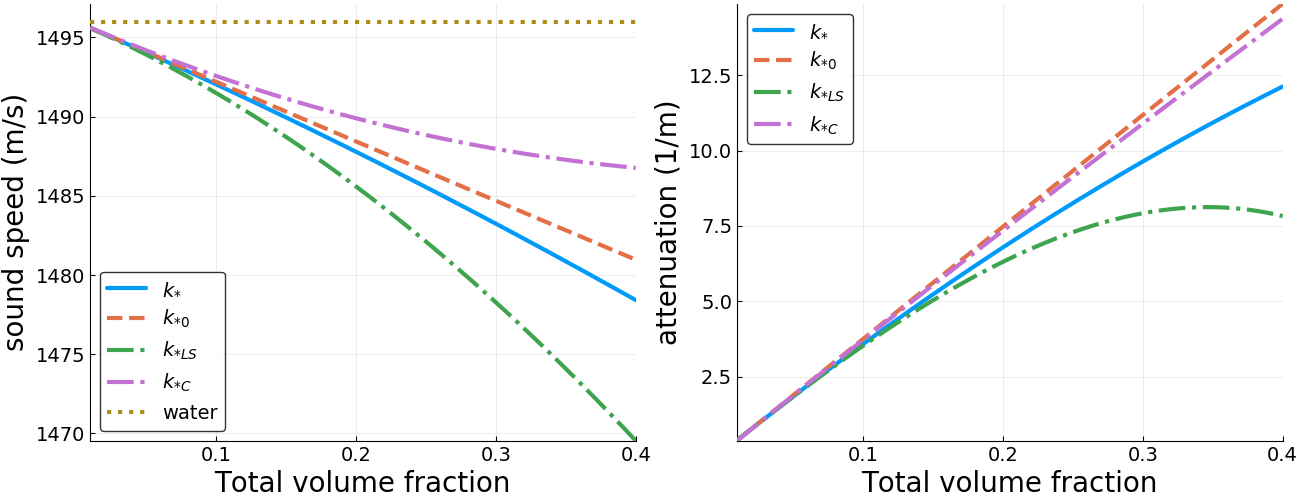

In [1]:
using EffectiveWaves

using LaTeXStrings
using Plots
height=500
# unicodeplots()
 pyplot(linewidth=3, size=(2.6*height,height))

 Plots.scalefontsizes(1.8)

filename="fluid"
mediumname = "water"
## choose material

  # fluid
  medium     = WaterDistilled
  inclusion1 = Glycerol # surfactant ?
  inclusion2 = Hexadecane
  # inclusion2 = SodiumNitrate
  # ωs = 2.0*pi*linspace(1.0e1,1.0e7,100)

  ωfactor = 4000;
  ω = ωfactor*real(medium.c)/2.0

  vols = 0.01:0.003:0.4
  vol_prop = 0.5
  r1 = 0.1/ωfactor; r2 = 1.0/ωfactor;


  # True wavenumber
  kTs = map(vols) do v
    sp1 = Specie(ρ=inclusion1.ρ ,r=r1, c=inclusion1.c, volfrac = v*vol_prop)
    sp2 = Specie(ρ=inclusion2.ρ ,r=r2, c=inclusion2.c, volfrac = v*(1.0 - vol_prop))
    wavenumber_low_volfrac(ω, medium, [sp1,sp2])
  end
  # low volfrac wavenumber
  kT2s = map(vols) do v
    sp1 = Specie(ρ=inclusion1.ρ ,r=r1, c=inclusion1.c, volfrac = v*vol_prop)
    sp2 = Specie(ρ=inclusion2.ρ ,r=r2, c=inclusion2.c, volfrac = v*(1.0 - vol_prop))
    wavenumber_very_low_volfrac(ω, medium, [sp1,sp2])
  end

  # Approximate wavenumber
  kTLSs = map(vols) do v
    sp1 = Specie(ρ=inclusion1.ρ ,r=r1, c=inclusion1.c, volfrac = v*vol_prop)
    sp2 = Specie(ρ=inclusion2.ρ ,r=r2, c=inclusion2.c, volfrac = v*(1.0 - vol_prop))
    two_species_approx_wavenumber(ω, medium, [sp1,sp2])
  end
  # Approximate challis
  kTCs = map(vols) do v
    sp1 = Specie(ρ=inclusion1.ρ ,r=r1, c=inclusion1.c, volfrac = v*vol_prop)
    sp2 = Specie(ρ=inclusion2.ρ ,r=r2, c=inclusion2.c, volfrac = v*(1.0 - vol_prop))
    multispecies_challis(ω, medium, [sp1,sp2])
  end

  kTs_arr = [kTs,kT2s, kTLSs,kTCs];
  speed_arr = [ ω./real(ks) for ks in kTs_arr];
  push!(speed_arr, 0.*real(kTs) + real(medium.c))
  atten_arr = imag.(kTs_arr)

  styles = [:solid :dash :dashdot :dashdot :dot]
  labs = [L"k_{*}" L"k_{*0}" L"k_{*LS}" L"k_{*C}" mediumname]
  ys_arr = speed_arr;
  xs = vols; xlabel = "Total volume fraction"
  m =5;
  p1 = plot(xs, ys_arr, xlabel=xlabel, ylabel="sound speed (m/s)", labels=labs
                 , line = styles, ylims = (minimum(minimum.(ys_arr)), maximum(ys_arr[1])*1.001));
  # y1 = min(ys_arr[1][1:m]..., ys_arr[2][1:m]...);
  # y2 = max(ys_arr[1][1:m]..., ys_arr[2][1:m]...);
  # p1 = gray_square!([xs[1],xs[m]],[y1,y2]);

  ys_arr = atten_arr;
  styles = [:solid :dash :dashdot :dashdot]
  labs = [L"k_{*}" L"k_{*0}" L"k_{*LS}" L"k_{*C}"]
  p2 = plot(xs, ys_arr, labels=labs, xlabel=xlabel, ylabel="attenuation (1/m)"
                      , line = styles )
                #  , ylims = (minimum(ys_arr[1]), maximum(ys_arr[1])*1.04));
  plot(p1,p2)

In [2]:
Plots.scalefontsizes(1/1.8)